![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index represeting the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index represeting the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index represeting the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index represeting the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index represeting the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index represeting the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index represeting the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index represeting the popularity of the keyword 'home gym' during the 5 year period. |

In [322]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [323]:
workouts = pd.read_csv('data/workout.csv',parse_dates=['month'])
workouts['month'] = workouts['month']
workouts

,month,workout_worldwide
0,2018-03-01,59
1,2018-04-01,61
2,2018-05-01,57
3,2018-06-01,56
4,2018-07-01,51
...,...,...
56,2022-11-01,47
57,2022-12-01,44
58,2023-01-01,62
59,2023-02-01,57


# When was the global search for 'workout' at it peak? 

## Peak Year

In [324]:
peak_search = workouts[workouts['workout_worldwide'] == workouts['workout_worldwide'].max()]
year_str = peak_search['month'].dt.year.iloc[0].astype(str)
year_str

'2020'

## Global search over time. 

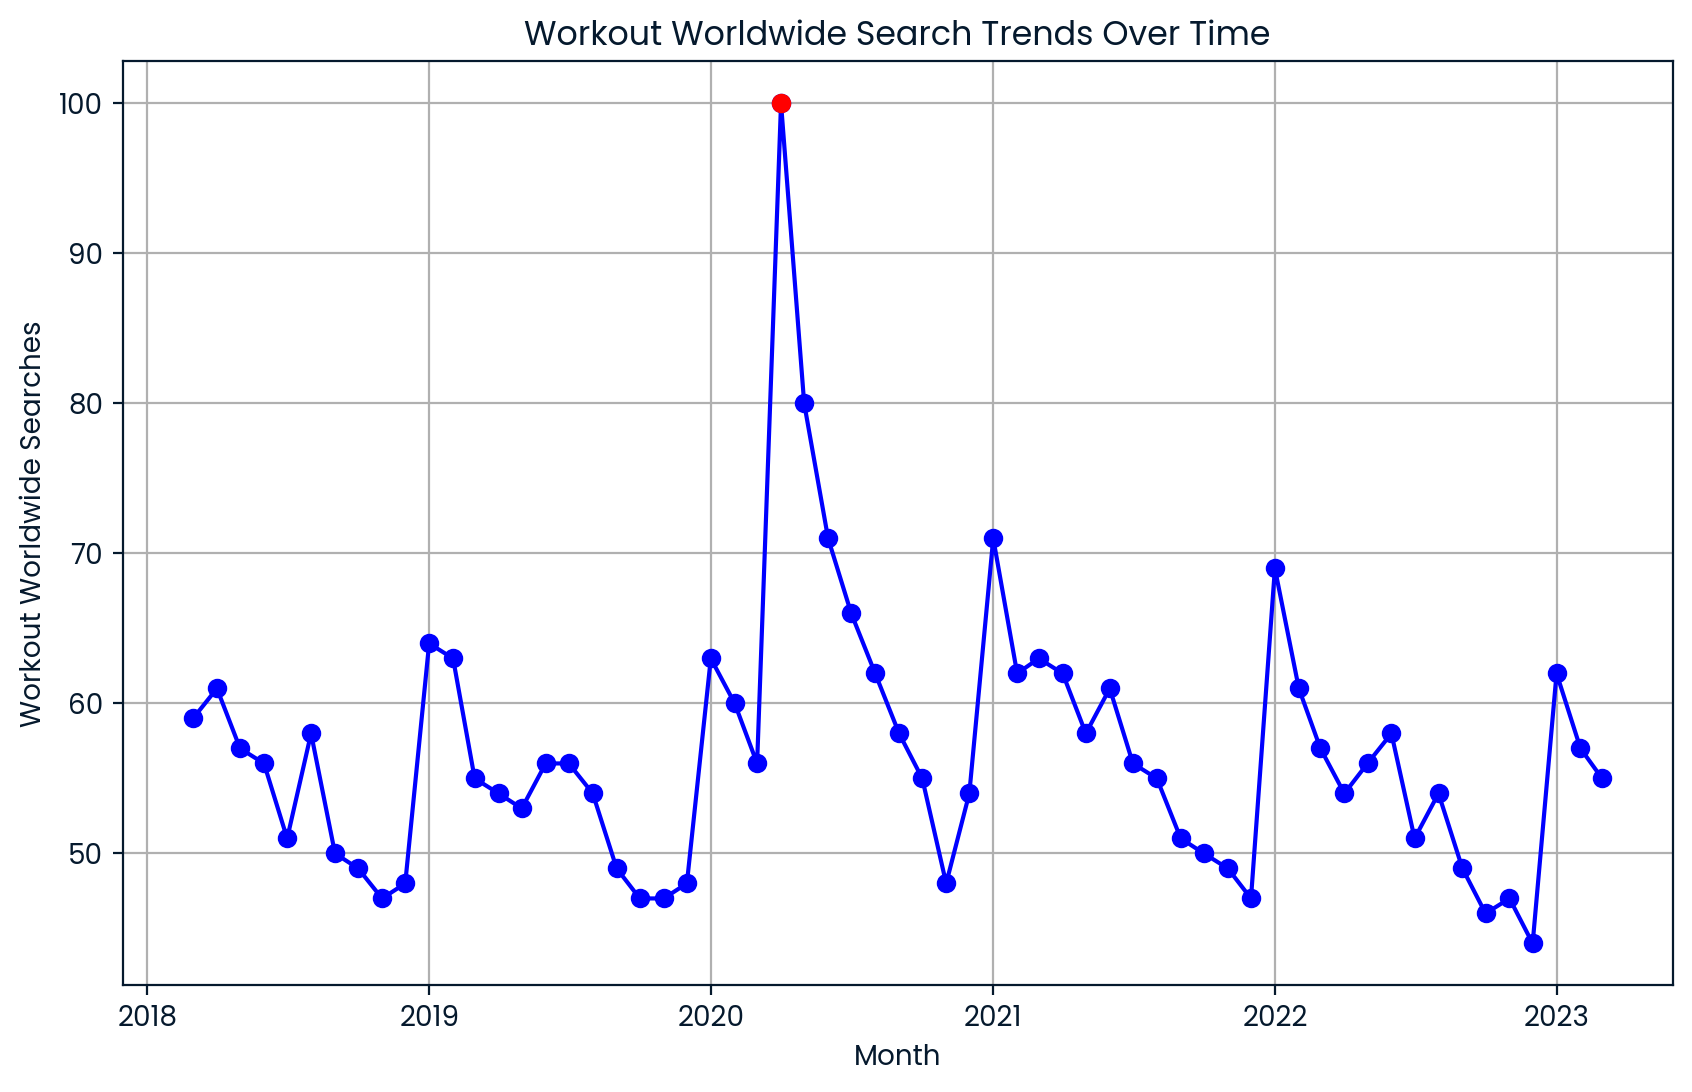

In [325]:
# Find the row with the maximum number of workout searches
peak_search = workouts[workouts['workout_worldwide'] == workouts['workout_worldwide'].max()]

# Create a chart to visualize the peak search time
plt.figure(figsize=(10, 6))
plt.plot(workouts['month'], workouts['workout_worldwide'], marker='o', linestyle='-', color='blue')
plt.scatter(peak_search['month'], peak_search['workout_worldwide'], color='red', zorder=5)
plt.title('Workout Worldwide Search Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Workout Worldwide Searches')
plt.grid(True)
plt.show()

# What was the most popular keyword during the covid pandemic and what is popular now? 

In [326]:
three_keywords = pd.read_csv('data/three_keywords.csv')
three_keywords.sort_values('month')


,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9
...,...,...,...,...
56,2022-11,11,18,12
57,2022-12,11,16,11
58,2023-01,17,22,15
59,2023-02,14,21,12


In [327]:
# Convert 'month' column to datetime to ensure proper filtering
three_keywords['month'] = pd.to_datetime(three_keywords['month'])

# Filter the dataframe for the year 2022
three_keywords_2022 = three_keywords[(three_keywords['month'] >= '2020-01-01') & (three_keywords['month'] < '2021-01-01')]

# Calculate the average of the keywords for the year 2022
avg_keywords_2022 = three_keywords_2022[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()
avg_keywords_2022


home_workout_worldwide    27.250000
gym_workout_worldwide     14.250000
home_gym_worldwide        19.916667
dtype: float64

In [328]:

avg_keywords_2022=avg_keywords_2022.reset_index()
avg_keywords_2022=avg_keywords_2022.rename(columns={0:'Keyword Average'})
avg_keywords_2022 = avg_keywords_2022.rename(columns={'0': 'Keyword Average'})
peak_covid=avg_keywords_2022.iloc[0].values[0]
peak_covid

'home_workout_worldwide'

In [329]:

# Filter the dataframe for the year 2023
three_keywords_2023 = three_keywords[(three_keywords['month'] >= '2023-01-01') & (three_keywords['month'] < '2024-01-01')]

# Calculate the average of the keywords for the year 2022
avg_keywords_2023 = three_keywords_2023[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()
avg_keywords_2023=avg_keywords_2023.reset_index()
avg_keywords_2023=avg_keywords_2023.rename(columns={0:'Keyword Average'})
current=avg_keywords_2023.iloc[1].values[0]
current

'gym_workout_worldwide'

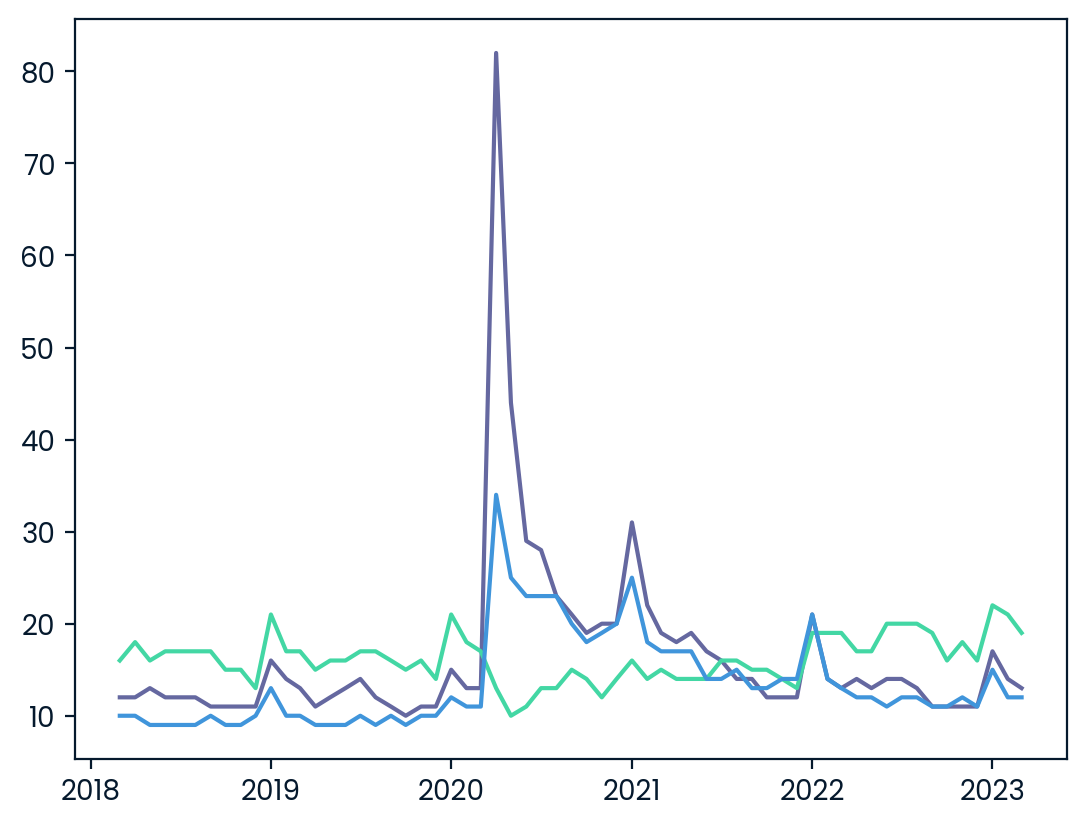

In [330]:
# Corrected code block
fig, ax = plt.subplots() 
three_keywords['month'] = pd.to_datetime(three_keywords['month']) 
ax.plot(three_keywords['month'], three_keywords['home_workout_worldwide'])
ax.plot(three_keywords['month'],three_keywords['gym_workout_worldwide'])
ax.plot(three_keywords['month'],three_keywords
        ['home_gym_worldwide'])
plt.show()

In [331]:
# Load the workout geography data
workout_geo = pd.read_csv('data/workout_geo.csv')
workout_geo_filtered=workout_geo.where(workout_geo['workout_2018_2023'] >50)
workout_geo_filtered=workout_geo_filtered.dropna()
top_country=workout_geo_filtered.iloc[0].values[0]
top_country


'United States'

In [332]:
import pandas as pd
three_keywords_geo = pd.read_csv('data/three_keywords_geo.csv')
three_keywords_geo['Country'] = three_keywords_geo['Country'].astype('string') 

three_keywords_geo_mean=three_keywords_geo.groupby('Country')['home_workout_2018_2023'].mean()
three_keywords_geo_mean=three_keywords_geo_mean.dropna()
three_keywords_geo= three_keywords_geo_mean.reset_index()
phil=three_keywords_geo['Country'].str.startswith('Phil')
malay=three_keywords_geo['Country'].str.startswith('Malay')



In [333]:
home_workout_geo=three_keywords_geo[phil].iloc[0].values[0]
home_workout_geo

'Philippines'

In [334]:
three_keywords_geo[malay]

,Country,home_workout_2018_2023
21,Malaysia,47.0
